# <font color='5D3FD3'>**FLORES DE LIRIO**</font>
La base de datos iris es una colección de datos, la cual ha sido ampliamente utilizada en el campo de la estadística y el aprendizaje automático; su creación fue en 1936 por el estadístico británico y biólogo Ronald Fisher. Esta base de datos es conocida por su utilidad en la clasificación de diferentes especies de plantas iris, existen tres tipos de plantas iris, esta base de datos nos brinda la cifra del largo y ancho, ya sea del pétalo o el sépalo, de esta manera buscamos ver la proporción de cada planta.

<center><img src='img/Iris.jpg' width='600'></center><br>

In [50]:
# Librerías
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# Cargar el DataFrame Iris
iris = load_iris()

print("\033[1;35m" + "DATAFRAME IRIS" + "\033[0m\n")
iris

DATAFRAME IRIS



{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
# Crear el DataFrame Iris
df_iris = pd.DataFrame(iris['data'], columns = iris['feature_names'])

# Agregar la columna 'target' al df_iris
df_iris['target'] = iris.target

# Quitar registros pertenecientes a Iris-virginica
df_iris = df_iris[df_iris['target'] != 2]

In [6]:
# Separar cada flor: setosa y versicolor
data_setosa = df_iris[df_iris['target'] == 0]
data_versicolor = df_iris[df_iris['target'] == 1]

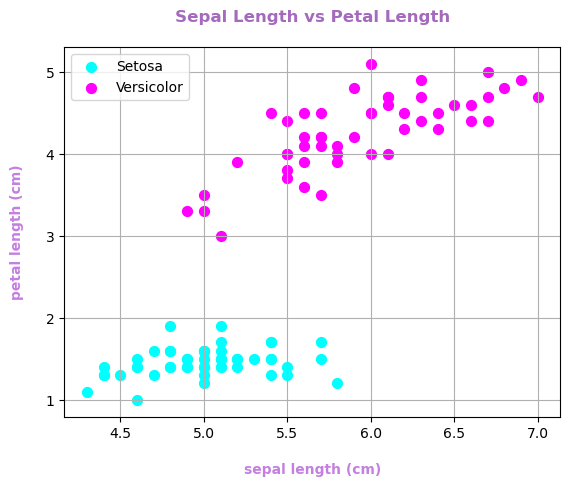

In [7]:
# Graficar
plt.figure()
plt.scatter(data_setosa['sepal length (cm)'], data_setosa['petal length (cm)'], label='Setosa', color='cyan', s=50)
plt.scatter(data_versicolor['sepal length (cm)'], data_versicolor['petal length (cm)'], label='Versicolor', color='magenta', s=50)

# Titulos
plt.title("Sepal Length vs Petal Length\n", color='#a569bd', weight='bold')
plt.xlabel('\nsepal length (cm)', color='#c47fe0', weight='bold')
plt.ylabel('petal length (cm)\n', color='#c47fe0', weight='bold')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
# Preparar los datos de entrada y salida
x = df_iris[['sepal length (cm)', 'petal length (cm)']].values
y = df_iris['target'].values

In [9]:
# Separar datos de entrenamiento y de prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((80, 2), (20, 2), (80,), (20,))

In [10]:
# Declarar mis hiperparámetros
epochs = 20
learning_rate = 0.05

In [11]:
# Inicializar y entrenar el Perceptron
perceptron = Perceptron(max_iter=epochs, eta0=learning_rate)

# Entrenar el perceptrón
perceptron.fit(x_train, y_train)

Perceptron(eta0=0.05, max_iter=20)

In [12]:
# Obtener los weights y bias ajustados
weights = perceptron.coef_[0]
bias = perceptron.intercept_[0]

print(f"\033[1;35mWeights ajustados:\033[0m {weights}")
print(f"\033[1;35mBias ajustado:\033[0m {bias}")

Weights ajustados: [-0.225  0.545]
Bias ajustado: -0.1


In [13]:
# Predecir el conjunto de pruebas
y_pred = perceptron.predict(x_test)

# Comprobar la predicción realizada
print(f"\033[1;35mValores predecidos:\033[0m\t {y_pred}")
print(f"\033[1;35mValores reales:\033[0m\t\t {y_test}")

Valores predecidos:	 [1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0]
Valores reales:		 [1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0]


In [14]:
# Calcular la métrica: Accuracy
accuracy = accuracy_score(y_pred, y_test)
print(f"\033[1;35mAccuracy del Perceptrón:\033[0m {accuracy}")

Accuracy del Perceptrón: 1.0


In [15]:
# Darle un valor propio
print(f"\033[1;35m[6.1, 4.0] --> \033[0m Iris {"Setosa" if perceptron.predict(np.array([6.1, 4.0]).reshape(1, -1)) == 0 else "Versicolor"}")
print(f"\033[1;35m[5.0, 1.5] --> \033[0m Iris {"Setosa" if perceptron.predict(np.array([5.0, 1.5]).reshape(1, -1)) == 0 else "Versicolor"}")

[6.1, 4.0] -->  Iris Versicolor
[5.0, 1.5] -->  Iris Setosa


## <font color='5D3FD3'>**Dividir Dataset**</font>
Datos de entrenamiento 60%, datos de validación 20% y datos de prueba 20%

In [47]:
# Separar datos de entrenamiento y de prueba
x_rest, x_test, y_rest, y_test = train_test_split(x, y, test_size = 0.2)
x_train, x_val, y_train, y_val = train_test_split(x_rest, y_rest, test_size = 0.2)

print(f"\033[1;35mEntrenamiento:\033[0m\t {x_train.shape}, {y_train.shape}")
print(f"\033[1;35mValidación:\033[0m\t {x_val.shape}, {y_val.shape}")
print(f"\033[1;35mPrueba:\033[0m\t\t {x_test.shape}, {y_test.shape}")

Entrenamiento:	 (64, 2), (64,)
Validación:	 (16, 2), (16,)
Prueba:		 (20, 2), (20,)


In [60]:
# Diagnosticar Overfitting
lr = LogisticRegression()

print("\033[1;35mOVERFITTING y UNDERFITTING\033[0m\n")
lr.fit(x_train, y_train) # (Datos Entrenamiento Entrada, Datos Entrenamiento Salida)

OVERFITTING y UNDERFITTING



LogisticRegression()

In [54]:
LogisticRegression()

LogisticRegression()

In [68]:
# Predecir en entrenamiento y validación
train_pred = lr.predict(x_train)
val_pred = lr.predict(x_val)

In [74]:
# Para diagnosticar Underfitting
# Cuando la métrica de entrenamiento tiene un valor menor al 70%
print(f"\033[1;35mAccuracy Entrenamiento:\033[0m {accuracy_score(y_train, train_pred) * 100:.2f}%\n") # (Datos de Entrenamiento Verdaderos, Datos de Entrenamiento Predecidos)

# Para diagnosticar el Overfitting
# Cuando la métrica es mucho más alta en datos de entrenamiento que en datos de validación
print(f"\033[1;35mAccuracy Validación:\033[0m {accuracy_score(val_pred, y_val)* 100:.2f}%")

Accuracy Entrenamiento: 100.00%

Accuracy Validación: 100.00%
